# Introduction to quantum circuits

In [3]:
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import matplotlib.pyplot as plotter
import numpy as np
from IPython.display import display, Math, Latex
%matplotlib inline
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-07-26 21:42:52,791: Credentials are already in use. The existing account in the session will be replaced.



Today we will learn some basic elements of qunatum computing which make it so special. You can brush up your [linear algebra](https://link.springer.com/content/pdf/bbm%3A978-1-4614-6336-8%2F1.pdf) (Only some initial sections from this link are revelant here) before seeing how it actually describes our physical states.

*Quantum mechanics: Real Black Magic Calculus*  
– Albert Einstein

It does feel amazing to imagine how the quantum properties such as **quantum superposition** and **entanglement** work in real life. Though mathematically, it can be expressed very easily with the help of linear algebra. Like the famous $|dead\rangle$ and $|alive\rangle$ states of Schrödinger's cat can be used to describe the state of the cat $|\psi\rangle$ as it would be a linear combination of $|dead\rangle$ and $|alive\rangle$.
$$ |\psi\rangle = \alpha|alive\rangle + \beta |dead\rangle$$
where $|\alpha|^2$ is the probability of it being alive and $|\beta|^2$ of it being dead. This implies that $|\beta|^2 + |\alpha|^2 = 1$ 
This is the same way a "quantum bit" or Qubit is described; but here the possible state we can measure (and we do it a lot) are the computational basis states i.e. $|0\rangle$ and $|1\rangle$ used in classical computation.
$$ |\psi\rangle = \alpha|0\rangle + \beta |1\rangle$$
where $|\psi\rangle$ is the state vector of the qubit. Here $\alpha,\beta \in \mathbb{C}$ and $|\beta|^2 + |\alpha|^2 = 1$. We can express a qubit on a **Bloch sphere** which gives us a nice idea of how we can visualize a qubit. Vectors to each pole (+z and -z) of the sphere represent the computational basis states. The state vector can lie anywhere on the Bloch sphere.  
Here are some examples:

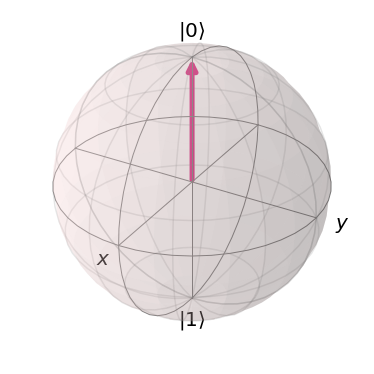

In [4]:
# The '0' state
plot_bloch_vector([0,0,1])

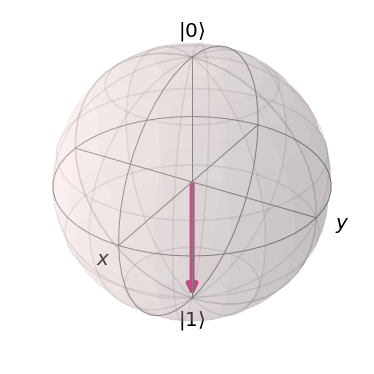

In [5]:
# The '1' state
plot_bloch_vector([0,0,-1])

We represent the state vector as $\left[ \begin{matrix} \alpha \\ \beta \end{matrix} \right]$ and so we can think of an operation on the qubit (vector) by a quantum gate (matrix) analogous to logic gates in classical bits.

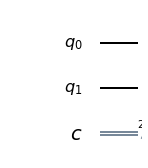

In [6]:
qc1 = QuantumCircuit(2,2) # Initializing a quantum ciruit (2 qubits, 2 classical bits) 
# All initialized to '0' by default.
qc1.draw(output='mpl') # Draws the circuit diagram

The only contraint for a matrix to be a quantum gate is the it should be **unitary** which derives from the fact that the operated qubit also follows $|\beta'|^2 + |\alpha'|^2 = 1$ 
For example $X = \left[\begin{matrix}
0 & 1\\1 & 0 
\end{matrix}\right]$ changes $\alpha$ to $\beta$ and $\beta$ to $\alpha$, which is similar to the classical NOT gate. We will first see some matrices (operations) which are already defined so we can directly used them.

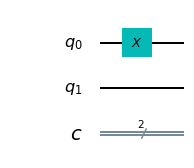

In [7]:
qc1.x(0) # Applying X gate to the first qubit
qc1.draw(output='mpl')


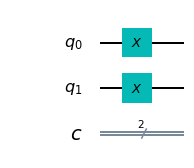

In [8]:
qc1.x(1) # Applying X gate to the second qubit
qc1.draw(output='mpl')

The X matrix we saw above is a part of an extremely important group of matrices called **Pauli matrices**.
Along with Pauli-X matrix we have Pauli-Y $= \left[\begin{matrix}0 & -\iota\\ \iota & 0 \end{matrix}\right]$ and Pauli-Z $ = \left[\begin{matrix}1 & 0\\0 & -1 \end{matrix}\right]$ and the Identity matrix $I$.


Other useful gate is the Hadamard Gate
$H: H = \frac{1}{\sqrt{2}}\left[\begin{matrix} 1 & 1\\ 1 & -1
\end{matrix}\right]$
which makes the following operations:
$|0\rangle \to \frac{|0\rangle+|1\rangle}{\sqrt{2}}$ (commonly referred as $|+\rangle$) and $|1\rangle \to \frac{|0\rangle-|1\rangle}{\sqrt{2}}$ (commonly referred as $|-\rangle$). Also notice that $H^2 = I$.


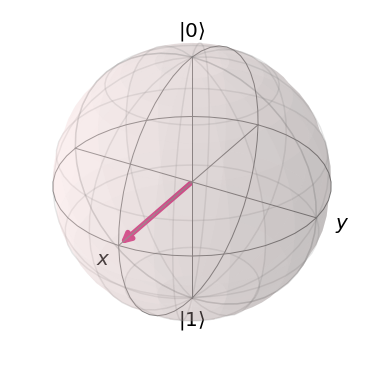

In [9]:
# The '+' state
plot_bloch_vector([1,0,0])

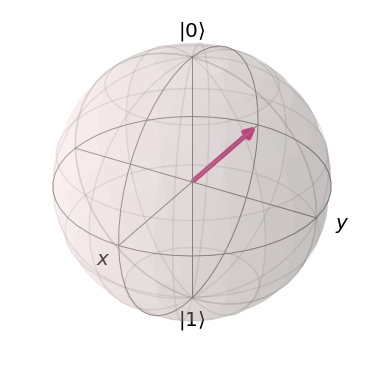

In [10]:
# The '-' state
plot_bloch_vector([-1,0,0])

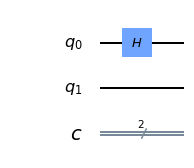

In [11]:
qc2 = QuantumCircuit(2,2) # A new quantum circuit with 2 qubits and 2 classical bits 
qc2.h(0) # Applying the Hadamard gate on first qubit
qc2.draw(output='mpl')

We are familiar with the 'if x then y' logic in our daily lives. For any 2 objects, this logic is useful as it describe their dependance on each other. So it is intuitive to think of a 2 qubit gate where in the fate of the second qubit is controlled by the first. We call these 'controlled operation' where a certain gate is applied to one qubit if the other qubit is in a particular state ( usually we consider when the $|1\rangle$ state).    
CX (CNOT) gate applies X gate to the 'target qubit' is the 'control qubit' is $|1\rangle$. We call it controlled - X or controlled - NOT operation. It changes the state $|ab\rangle$ to $|a (a\oplus b)\rangle$



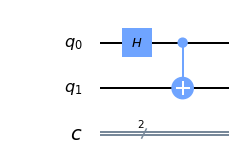

In [12]:
qc2.cx(0,1) # Applying CX gate ('control','target')
qc2.draw(output='mpl')

Now we are about to see a great example of  
  
  <img src="https://raw.githubusercontent.com/mnp-club/Quantum_Computing_Workshop_2020/master/images/dark_got_me_this.jpeg" width = "400" height = "400"></img>


Quantum entanglement is a physical phenomenon in which the quantum state of a particle cannot be described independently of the state of the other. Which means that measuring one particle automatically reveals the state of other. This strange phenomenon is captured beautifully in qubits. For example if we could create a state which has equal probability of two qubits, either both $|0\rangle$ or both $|1\rangle$ or in other words $|\psi\rangle = \frac{|00\rangle + |11\rangle }{\sqrt{2}}$. Surprisingly, we already have such a structure! If you look carefully at <code>qc2</code> and work out the opearations on pen and paper taking $q_0=q_1=0$, we will get the $|\psi\rangle$ mentioned above. We can measure the qubits in <code>qc2</code> to verify this.

{'00': 992, '11': 1008}


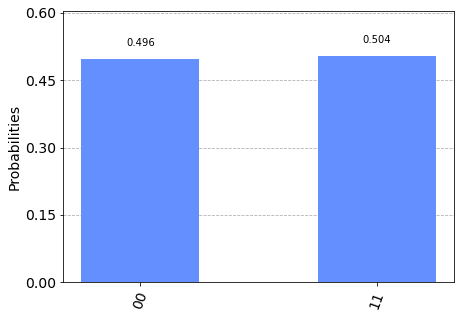

In [13]:
qc2.measure(0,0) # Measure first qubit and store it in first classical bit 
qc2.measure(1,1) # Measure second qubit and store it in second classical bit
# The code below plots a histogram of the measurement result. You can copy it for further use.
def run_circuit(qc):
    backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
    result = execute(qc, backend, shots = 2000).result() # we run the simulation
    counts = result.get_counts() # we get the counts
    return counts

counts = run_circuit(qc2)
print(counts)
plot_histogram(counts)

But there is no unique thing about choosing the initial qubits as $|0\rangle$. For the 4 possible intial states $|00\rangle,|01\rangle,|10\rangle,|11\rangle$ we get 4 states, each of them show this property of entanglement. These are called **Bell states** or **EPR pairs** and as we saw they are formed after applying Hadamard gate to the first qubit and a CX gate keeping first qubit as control and second as target.

## Your task

1) Create a bell state such that the 2 qubits are always in opposite states after measurement.
Use the already developed <code>qc1</code> earlier. Verify it by plotting a histogram. (**1 point**)

{'10': 980, '01': 1020}


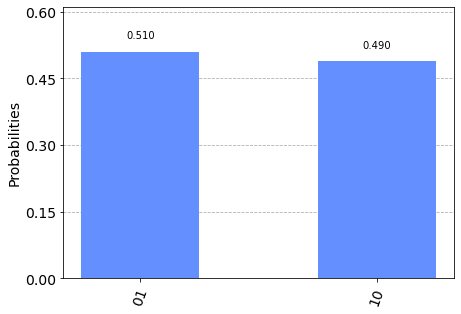

In [17]:
qc1 = QuantumCircuit(2, 2)
qc1.h(0)
qc1.cx(0, 1)
qc1.x(1)
qc1.measure(0, 0)
qc1.measure(1, 1)

counts = run_circuit(qc1)
print(counts)
plot_histogram(counts)

The **Toffoli gate** (also called controlled-controlled-not) can be considered similar to the CNOT gate but instead of 1 control qubit, we have 2 of them. It changes the state $|abc\rangle$ to $|ab(a\cdot b\oplus c)\rangle$.  This gate is very useful and it can be used classically for all operations (universal). We can prove it by making a NAND gate from it by setting the variables as the control bits and '1' as target bit. Rest is simple boolean algebra.
<img src="https://raw.githubusercontent.com/mnp-club/Quantum_Computing_Workshop_2020/master/images/toffoli.png" width = "300" height = "300"></img>


{'011': 2000}


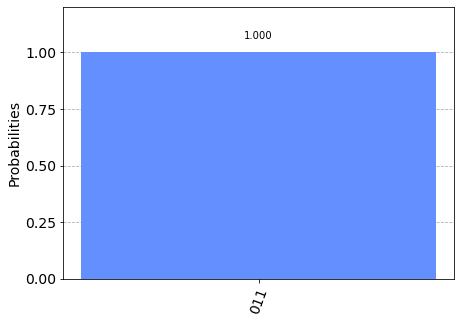

In [20]:
qc3 = QuantumCircuit(3,3)
qc3.x(range(3)) # Setting the all qubits to '1'
qc3.toffoli(0,1,2) # (control,control,target)
qc3.measure(0,0)
qc3.measure(1,1)
qc3.measure(2,2)
def run_circuit(qc3): 
    backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
    result = execute(qc3, backend, shots = 2000).result() # we run the simulation
    counts = result.get_counts() # we get the counts
    return counts

counts = run_circuit(qc3)
print(counts)
plot_histogram(counts)
# The output should be '011' as the highest (q2) is flipped because the other two qubits were set to '1'

Some of the other important gates which you would appreciate later are the phase gate $S = \left[\begin{matrix} 1 & 0\\ 0 & \iota
\end{matrix}\right]$ which changes the phase of the amplitude of $|1\rangle$ and the $\frac{\pi}{8}$ gate $ T = \left[\begin{matrix} 1 & 0\\ 0 & e^{\frac{\iota \pi}{4}}
\end{matrix}\right]$. We can see that $S=T^2$.  
The beauty of quantum gates is the as they are unitary, their operation can be inverted just by applying their conjugate transpose gate.
$S^\dagger S = \left[\begin{matrix} 1 & 0\\ 0 & -\iota
\end{matrix}\right]\left[\begin{matrix} 1 & 0\\ 0 & \iota
\end{matrix}\right] = I.$

## Your task

2) Implement the swap operation as shown below and verify using histogram.
(**1 point**)

<img src = 'https://raw.githubusercontent.com/mnp-club/Quantum_Computing_Workshop_2020/master/images/swap.png'></img>

{'11': 2000}


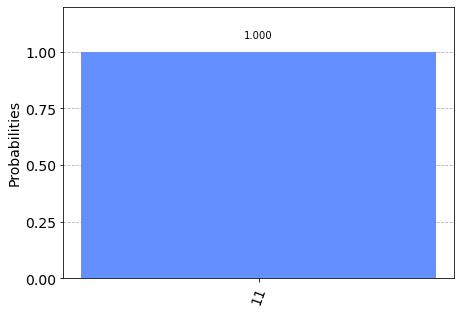

In [25]:
qc4 = QuantumCircuit(2,2)
qc4.x([0, 1]) # Set any one qubit to '1' to see a noticable difference between input and output.

qc4.cx(0, 1)
qc4.cx(1, 0)
qc4.cx(0, 1)
qc4.draw(output="mpl")

qc4.measure(0, 0)
qc4.measure(1, 1)

counts = run_circuit(qc4)
print(counts)
plot_histogram(counts)

3) If you look closely, you will find that $HYH = -Y$ by simple matrix multiplication. Similarly prove that $HZH = X$ by applying those matrices on the left hand side to 2 qubits, set to $|0\rangle$ and $|1\rangle$ (as we can't determine a single qubit operation with only one measurement) and measuring it by plotting on a histogram. (**2 points**)


{'01': 2000}


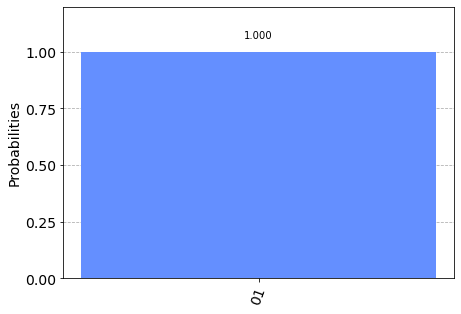

In [26]:
qc5 = QuantumCircuit(2,2)
qc5.x(1) # Turn the 2nd qubit to 1.

qc5.h(0)
qc5.z(0)
qc5.h(0)

qc5.h(1)
qc5.z(1)
qc5.h(1)

qc5.measure(0, 0)
qc5.measure(1, 1)

counts = run_circuit(qc5)
print(counts)
plot_histogram(counts)

4) Create a circuit in which 2 qubits are swapped if the third qubit is in the state $\frac{1}{\sqrt{2}}|0\rangle - \frac{1 + \iota}{2}|1\rangle$. You can use any the gates we learned today.(**3 points**)   
Hint: Try to think of this as a kind of controlled operation.

{'101': 2000}


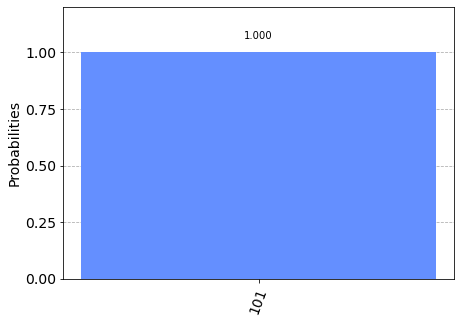

In [55]:
qc6 = QuantumCircuit(3,3)
r = np.random.random() * 1
beta = np.random.random() * 2*np.pi
# qc6.initialize([np.sqrt(1-r**2), r*np.exp(1j*beta)], 2) # Set any one qubit of the 2 swapping qubits to '1' to see a noticable difference between input and output.
qc6.initialize([1/np.sqrt(2), -(1+1j)/2], 2)
qc6.x(1)

qc6.tdg(2)
qc6.h(2)
qc6.toffoli(2, 0, 1)
qc6.toffoli(2, 1, 0)
qc6.toffoli(2, 0, 1)

qc6.measure(0, 0)
qc6.measure(1, 1)
qc6.measure(2, 2)

counts = run_circuit(qc6)
print(counts)
plot_histogram(counts)